In [1]:
pip install ipywidgets

  Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install kagglehub


  Using cached kagglehub-0.3.6-py3-none-any.whl (51 kB)
     ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\jessicali9530\celeba-dataset\versions\2


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: No module named 'matplotlib'

In [14]:
directory = r'C:\Users\HP\.cache\kagglehub\datasets\jessicali9530\celeba-dataset\versions\2'

# Get all images from dir
dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=directory, color_mode='rgb',
                                                   batch_size=128, image_size=(32,32), label_mode=None,
                                                   shuffle=True, seed=42)

# Normalize the data

dataset=dataset.map(lambda x: x /255.00)

Found 202599 files belonging to 1 classes.


In [15]:
# Grid of image
from mpl_toolkits.axes_grid1 import ImageGrid

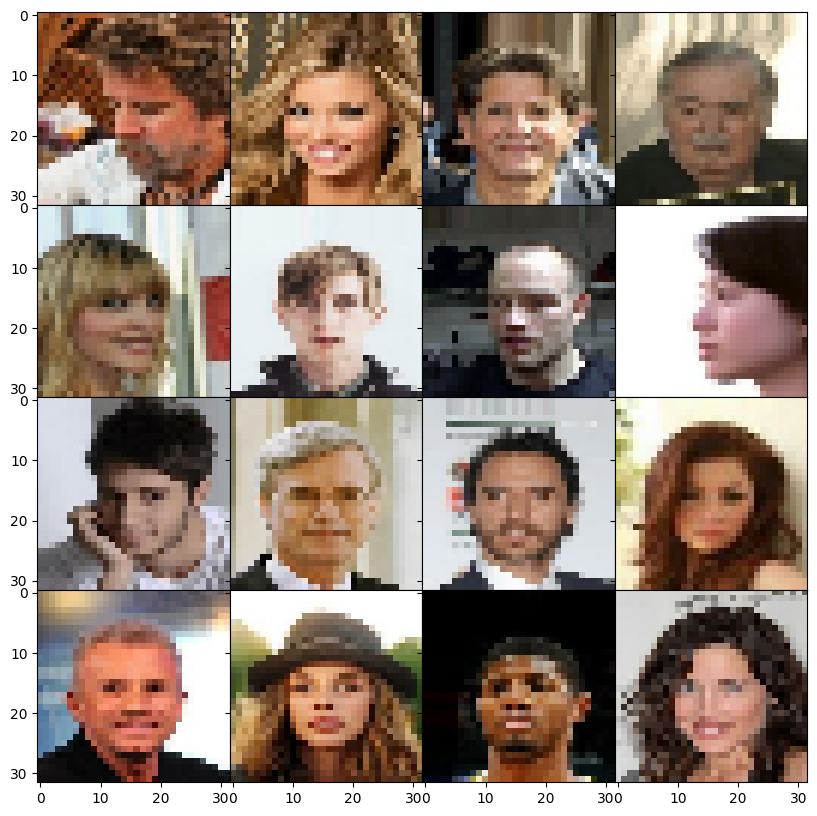

In [16]:
it=iter(dataset)
one_batch = next(it).numpy()
images = one_batch[:16,:,:,:]

# show the image

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4,4),
         axes_pad=0)
for ax,im in zip(grid, images):
    ax.imshow(im)
plt.show()

In [17]:
from tensorflow.keras.layers import Conv2D, LeakyReLU,BatchNormalization, Dropout, Flatten, Dense, Activation, Reshape
from tensorflow.keras import Model, Input

def discriminator_model():
    disc_input = Input(shape=(32,32,3), name='discriminator_network')
    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(disc_input)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Flatten()(x)
    x=Dense(1)(x)

    output = Activation('sigmoid')(x)

    disc=Model(inputs = disc_input, outputs=output)

    return disc

In [18]:
disc_model = discriminator_model()
disc_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 discriminator_network (Inpu  [(None, 32, 32, 3)]      0         
 tLayer)                                                         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                             

In [19]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dropout, Flatten, Dense, Activation, Reshape, Conv2DTranspose
from tensorflow.keras import Model, Input

def generator_model(z_dim=100):
    gen_input = Input(shape=(z_dim,), name='generator_network')  # Note the comma to make it a tuple

    x = Dense(8*8*3)(gen_input)
    x = Reshape(target_shape=(8,8,3))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=512, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=256, kernel_size=3, strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=128, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=64, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=3, kernel_size=3, strides=(1,1), padding='same')(x)
    fake_images_gen = LeakyReLU()(x)

    model_gen = Model(inputs=gen_input, outputs=fake_images_gen)

    return model_gen

In [20]:
gen_model = generator_model()

In [21]:
gen_model.summary(0)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator_network (InputLay  [(None, 100)]            0         
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 192)               19392     
                                                                 
 reshape (Reshape)           (None, 8, 8, 3)           0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 3)          12        
 ormalization)                                                   
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8, 8, 3)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 512)        1433

In [22]:
disc_model = discriminator_model()
gen_model = generator_model()
# Image Classification CNN
# Compile the model that trains disc.
disc_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
from tensorflow.keras import Input, Model

z_dim = 100
disc_model.trainable = False

# Corrected: Pass the shape as a tuple
model_input = Input(shape=(z_dim,), name='model_input')

# Pass the generator's output to the discriminator
model_output = disc_model(gen_model(model_input))

# Create the combined model
model = Model(model_input, model_output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_input (InputLayer)    [(None, 100)]             0         
                                                                 
 model_3 (Functional)        (None, 32, 32, 3)         1736143   
                                                                 
 model_2 (Functional)        (None, 1)                 297281    
                                                                 
Total params: 2,033,424
Trainable params: 1,733,961
Non-trainable params: 299,463
_________________________________________________________________


In [25]:
def train_discriminator(batch, batch_size):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    disc_model.train_on_batch(batch, valid)

    noise = np.random.normal(0,1, (batch_size, z_dim))
    gen_image = gen_model.predict(noise)
    disc_model.train_on_batch(gen_image, fake)
def train_generator(batch_size):
    valid = np.ones((batch_size, 1))
    noise = np.random.normal(0,1, (batch_size, z_dim))
    model.train_on_batch(noise, valid)

In [26]:
def save_image(fake_image, path):
    image = tf.keras.preprocessing.image.array_to_img(fake_image.numpy())
    tf.keras.preprocessing.image.save_img(path, image)
    return image
def generate_and_save_image(path):
    noise = np.random.normal(0,1, (1, z_dim))
    fake_images = gen_model(noise)
    image = save_image(fake_images[0], path)
    plt.imshow(image)
    plt.show()

No of Epochs-> 0
4/4 [==============================] - 1s 150ms/step
Batch Images-> 0


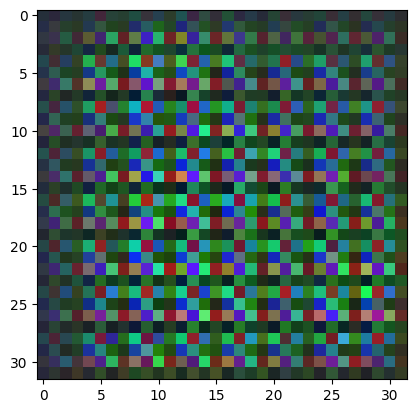

4/4 [==============================] - 1s 207ms/step
Batch Images-> 100


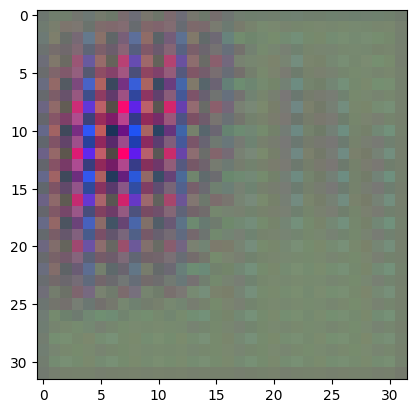

4/4 [==============================] - 1s 176ms/step
Batch Images-> 200


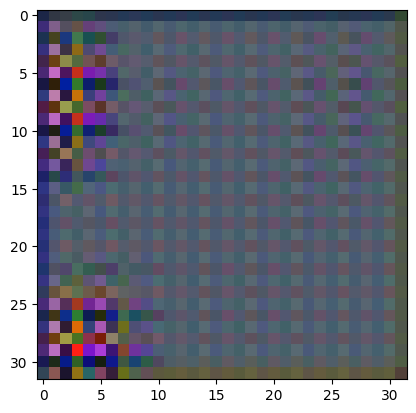

4/4 [==============================] - 1s 208ms/step
Batch Images-> 300


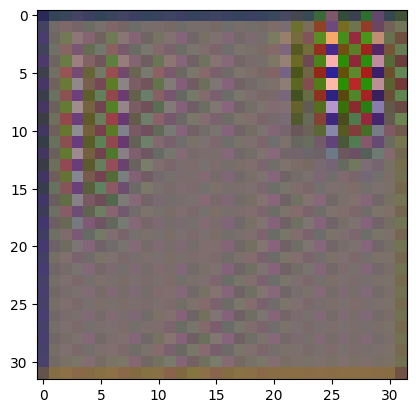

4/4 [==============================] - 1s 186ms/step
Batch Images-> 400


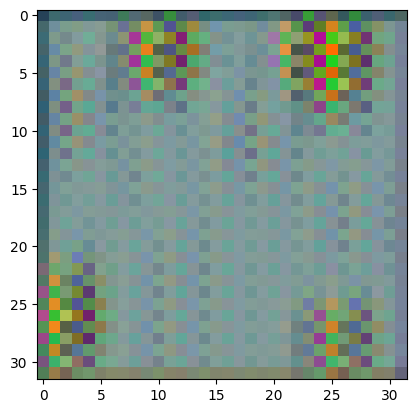

4/4 [==============================] - 1s 175ms/step
Batch Images-> 500


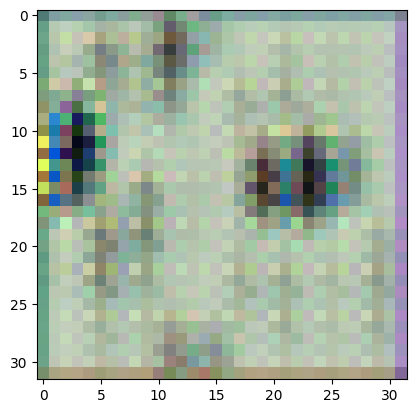

4/4 [==============================] - 1s 198ms/step
Batch Images-> 600


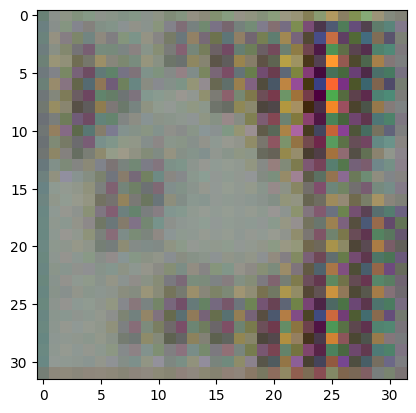

4/4 [==============================] - 1s 254ms/step
Batch Images-> 700


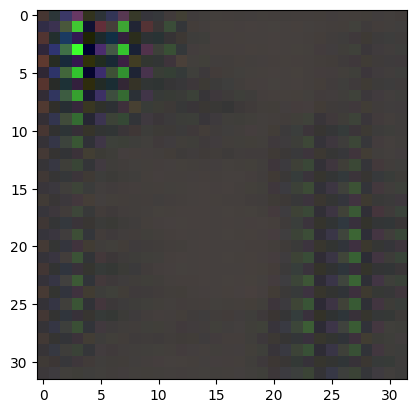

4/4 [==============================] - 1s 201ms/step
Batch Images-> 800


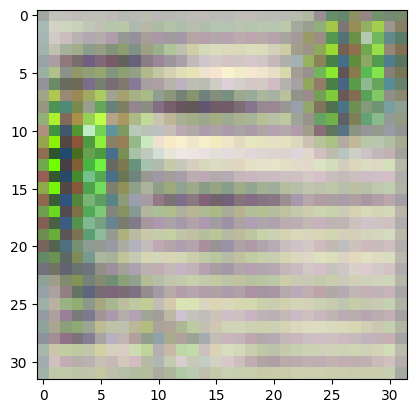

4/4 [==============================] - 1s 187ms/step
Batch Images-> 900


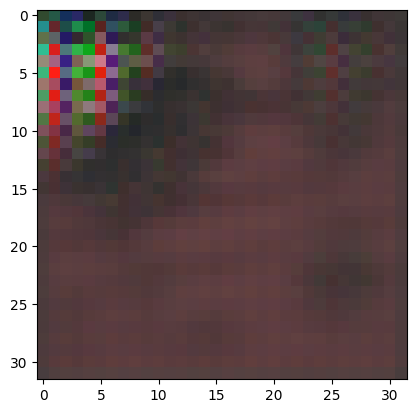

4/4 [==============================] - 1s 211ms/step
Batch Images-> 1000


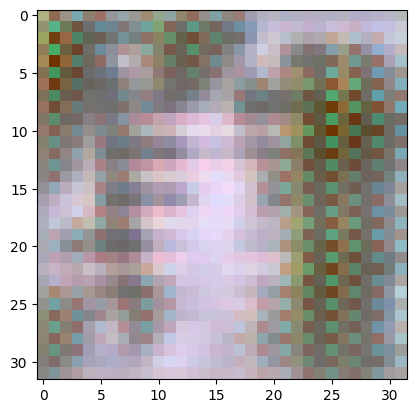

4/4 [==============================] - 1s 176ms/step
Batch Images-> 1100


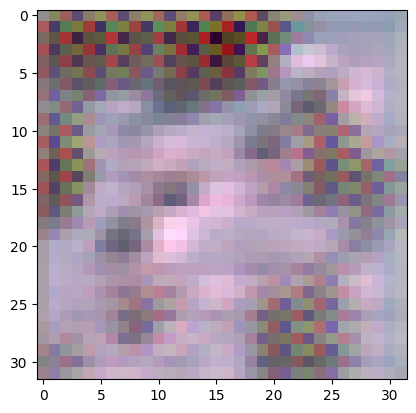

4/4 [==============================] - 1s 186ms/step
Batch Images-> 1200


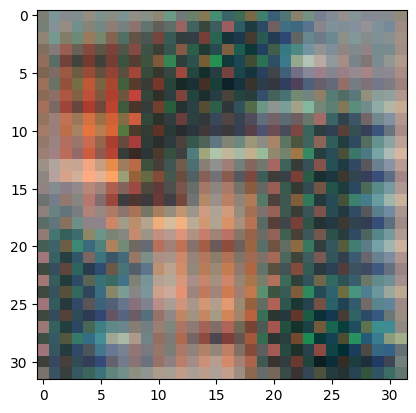

4/4 [==============================] - 1s 179ms/step
Batch Images-> 1300


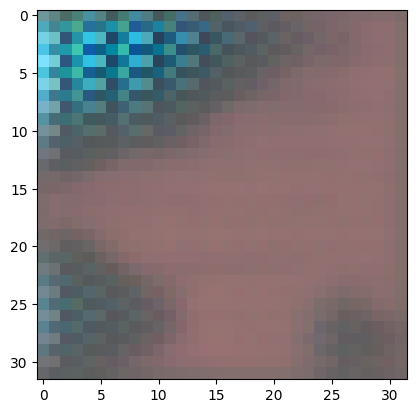

4/4 [==============================] - 1s 244ms/step
Batch Images-> 1400


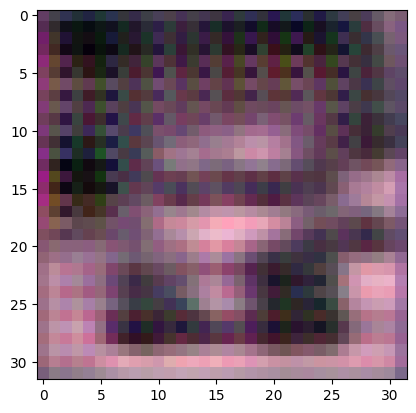

4/4 [==============================] - 1s 182ms/step
Batch Images-> 1500


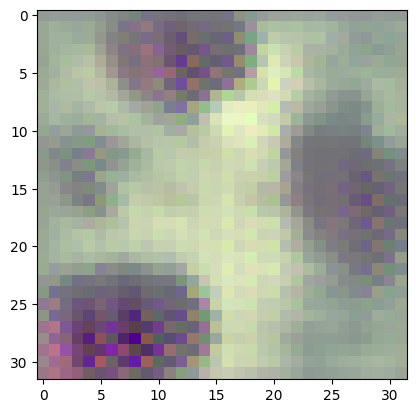

4/4 [==============================] - 1s 124ms/step
No of Epochs-> 1
4/4 [==============================] - 1s 199ms/step
Batch Images-> 0


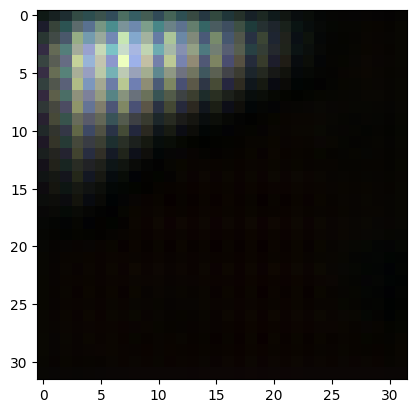

4/4 [==============================] - 1s 160ms/step
Batch Images-> 100


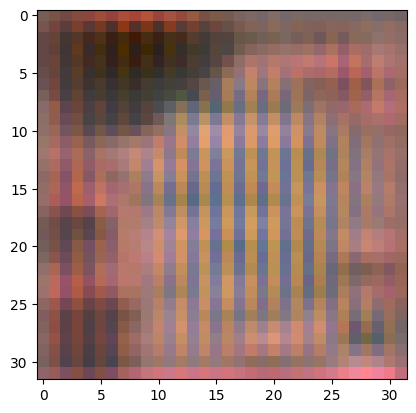

4/4 [==============================] - 1s 195ms/step
Batch Images-> 200


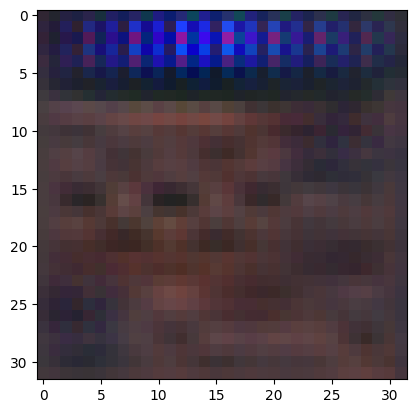

4/4 [==============================] - 1s 198ms/step
Batch Images-> 300


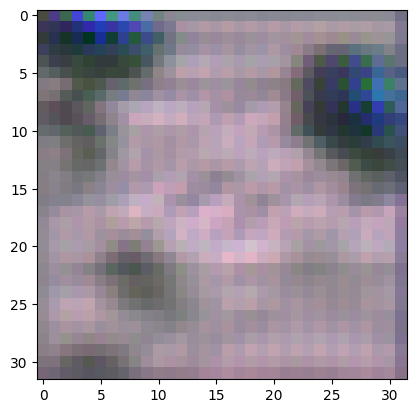

4/4 [==============================] - 1s 189ms/step
Batch Images-> 400


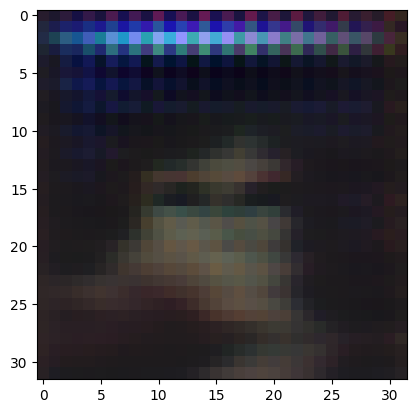

4/4 [==============================] - 1s 201ms/step
Batch Images-> 500


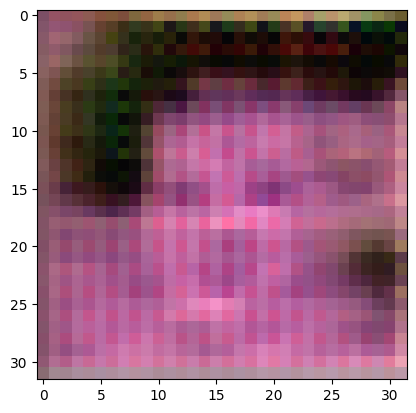

4/4 [==============================] - 1s 161ms/step
Batch Images-> 600


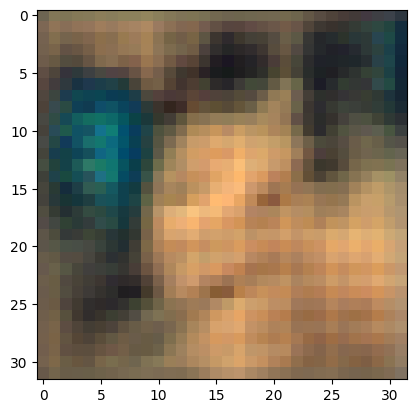

4/4 [==============================] - 1s 157ms/step
Batch Images-> 700


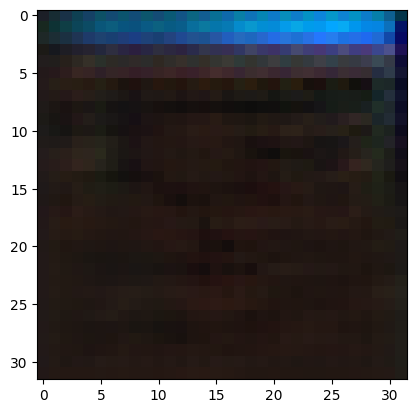

4/4 [==============================] - 1s 151ms/step
Batch Images-> 800


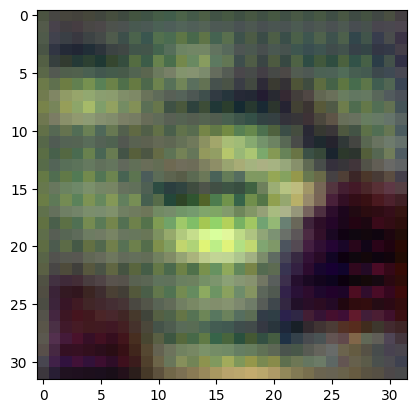

4/4 [==============================] - 1s 159ms/step
Batch Images-> 900


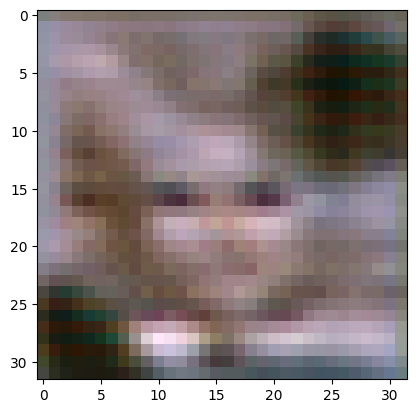

4/4 [==============================] - 1s 175ms/step
Batch Images-> 1000


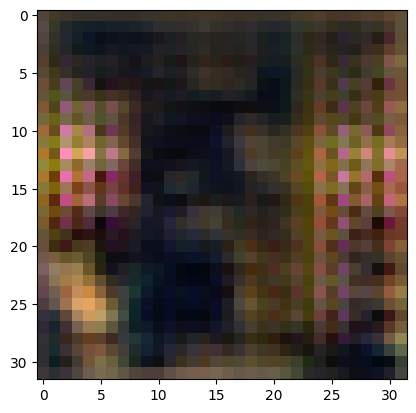

4/4 [==============================] - 1s 155ms/step
Batch Images-> 1100


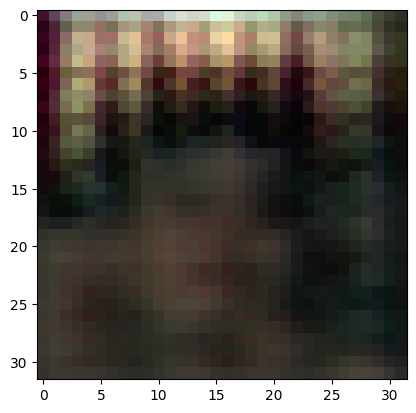

4/4 [==============================] - 1s 176ms/step
Batch Images-> 1200


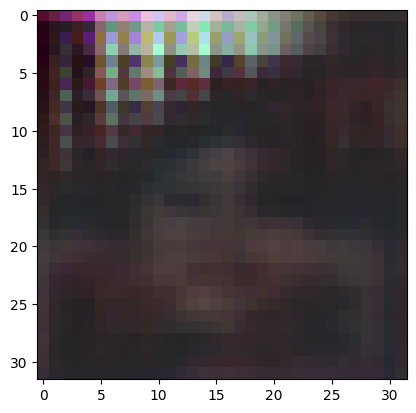

4/4 [==============================] - 1s 176ms/step
Batch Images-> 1300


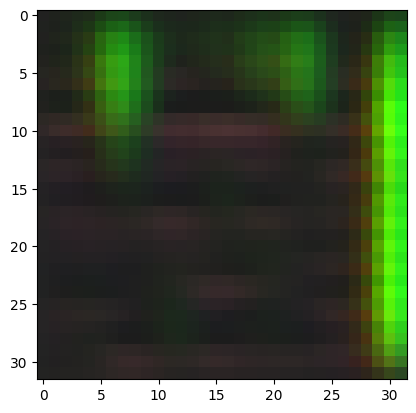

4/4 [==============================] - 1s 164ms/step
Batch Images-> 1400


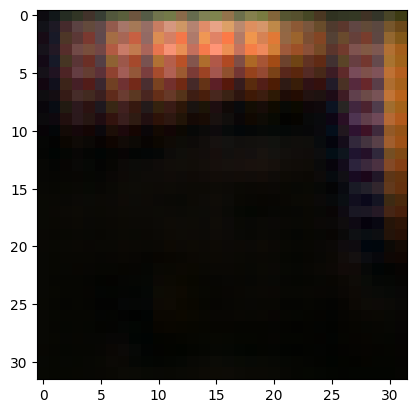

4/4 [==============================] - 1s 174ms/step
Batch Images-> 1500


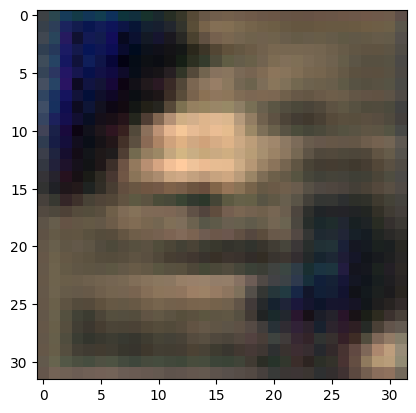

4/4 [==============================] - 1s 117ms/step
No of Epochs-> 2
4/4 [==============================] - 1s 156ms/step
Batch Images-> 0


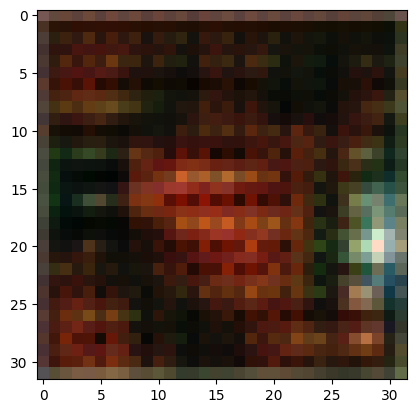

4/4 [==============================] - 1s 167ms/step
Batch Images-> 100


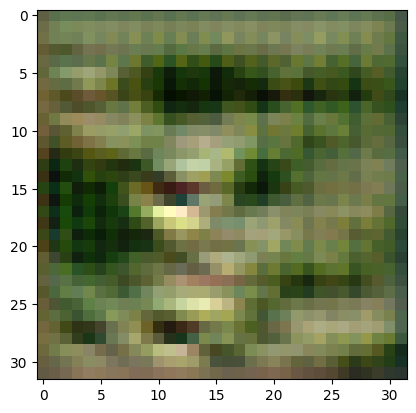

4/4 [==============================] - 1s 154ms/step
Batch Images-> 200


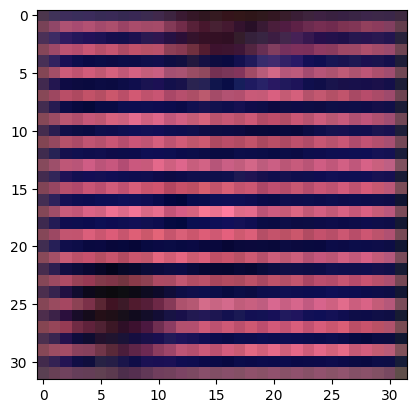

4/4 [==============================] - 1s 155ms/step
Batch Images-> 300


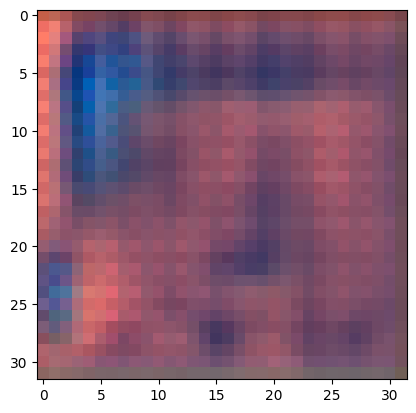

4/4 [==============================] - 1s 152ms/step
Batch Images-> 400


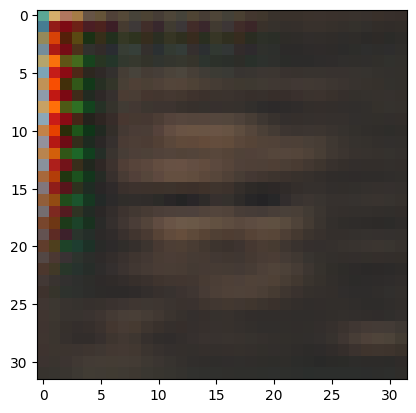

4/4 [==============================] - 1s 177ms/step
Batch Images-> 500


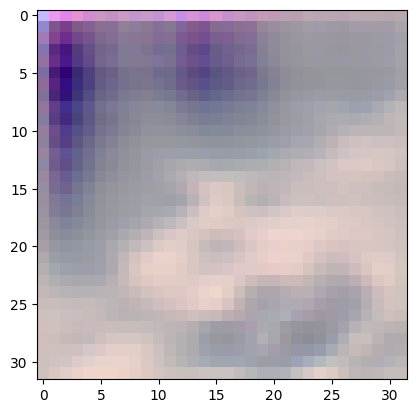

4/4 [==============================] - 1s 172ms/step
Batch Images-> 600


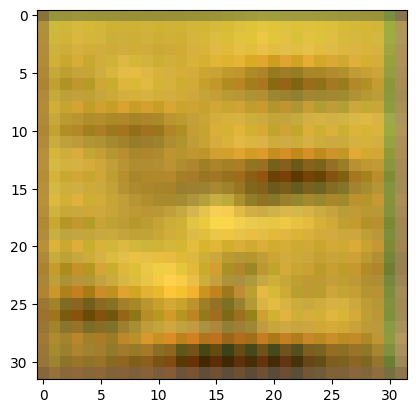

4/4 [==============================] - 1s 173ms/step
Batch Images-> 700


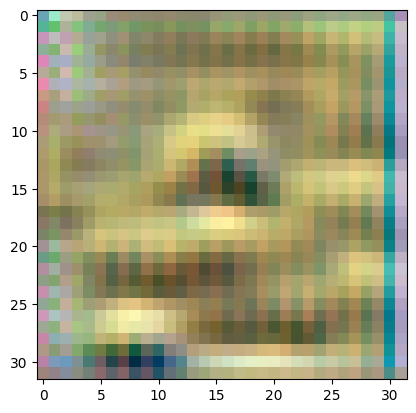

4/4 [==============================] - 1s 175ms/step
Batch Images-> 800


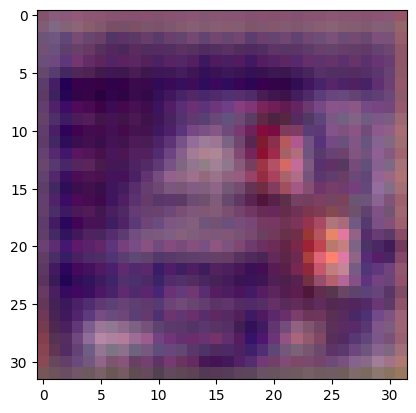

4/4 [==============================] - 1s 160ms/step
Batch Images-> 900


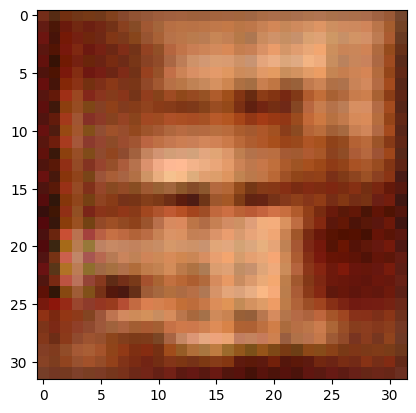

4/4 [==============================] - 1s 164ms/step
Batch Images-> 1000


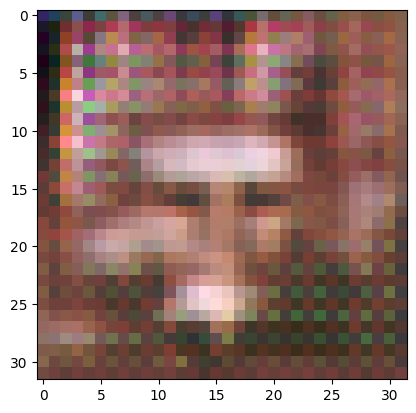

4/4 [==============================] - 1s 154ms/step
Batch Images-> 1100


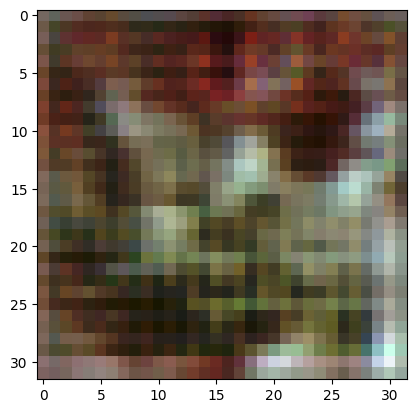

4/4 [==============================] - 1s 156ms/step
Batch Images-> 1200


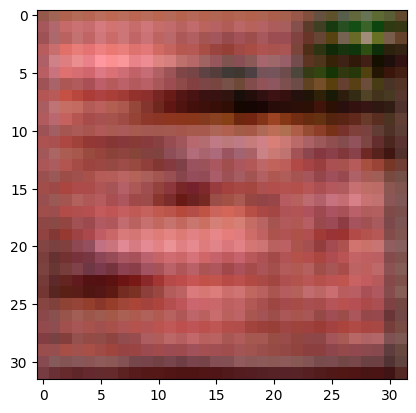

4/4 [==============================] - 1s 166ms/step
Batch Images-> 1300


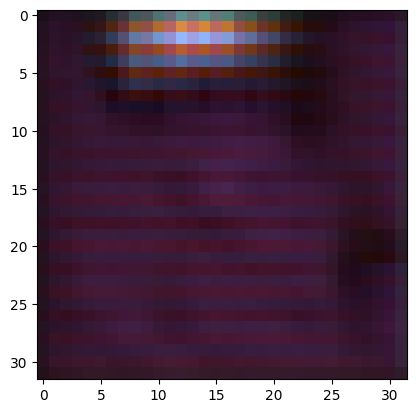

4/4 [==============================] - 1s 165ms/step
Batch Images-> 1400


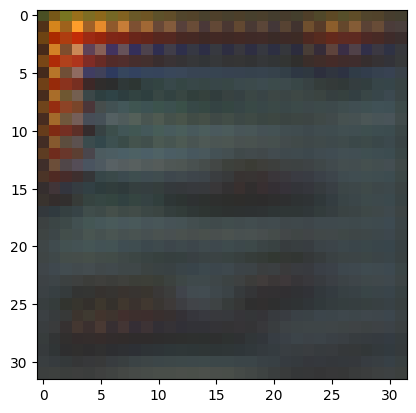

4/4 [==============================] - 1s 162ms/step
Batch Images-> 1500


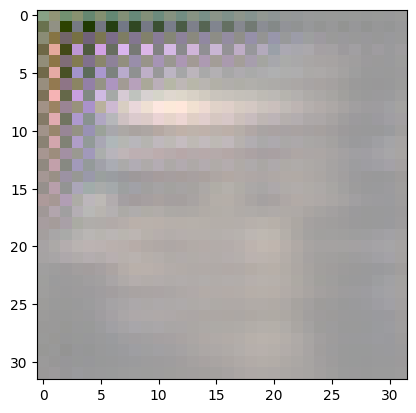

4/4 [==============================] - 1s 119ms/step
No of Epochs-> 3
4/4 [==============================] - 1s 158ms/step
Batch Images-> 0


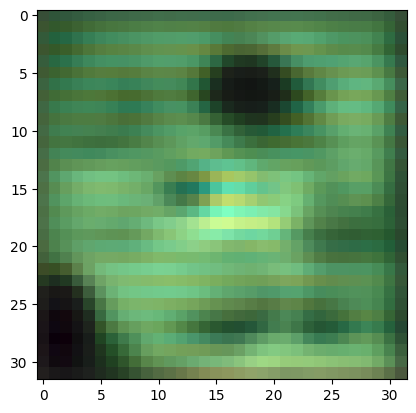

4/4 [==============================] - 1s 156ms/step
Batch Images-> 100


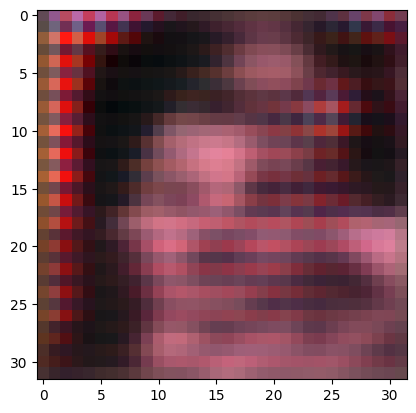

4/4 [==============================] - 1s 166ms/step
Batch Images-> 200


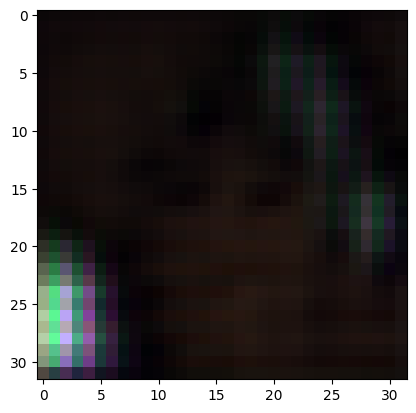

4/4 [==============================] - 1s 166ms/step
Batch Images-> 300


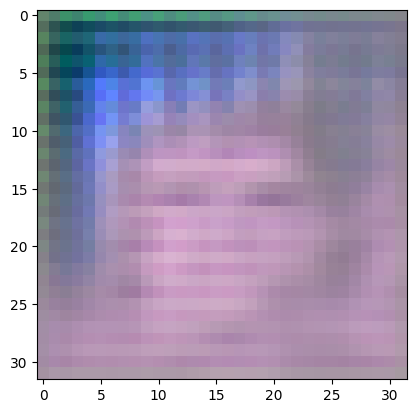

4/4 [==============================] - 1s 155ms/step
Batch Images-> 400


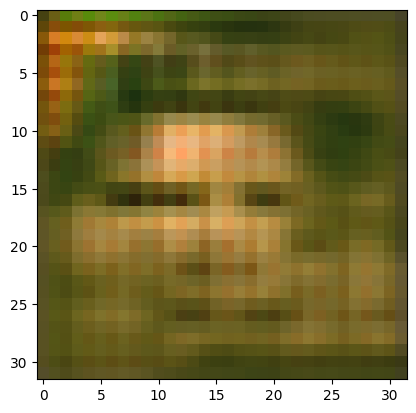

4/4 [==============================] - 1s 165ms/step
Batch Images-> 500


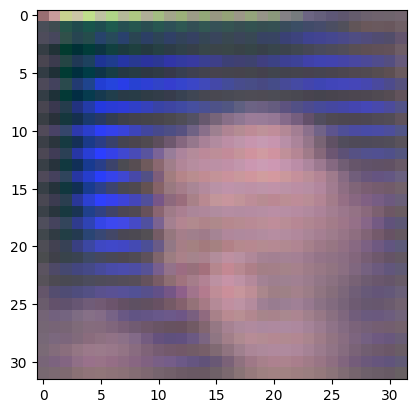

4/4 [==============================] - 1s 158ms/step
Batch Images-> 600


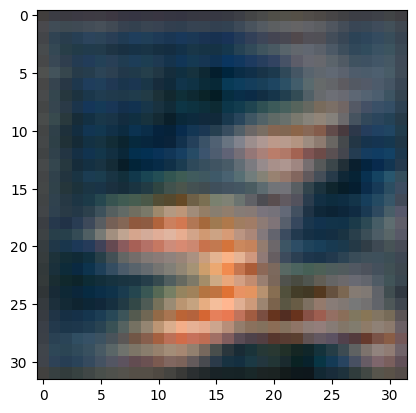

4/4 [==============================] - 1s 172ms/step
Batch Images-> 700


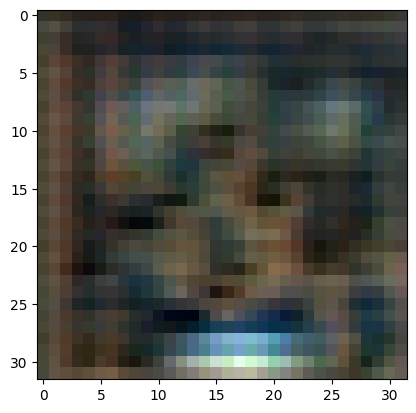

4/4 [==============================] - 1s 175ms/step
Batch Images-> 800


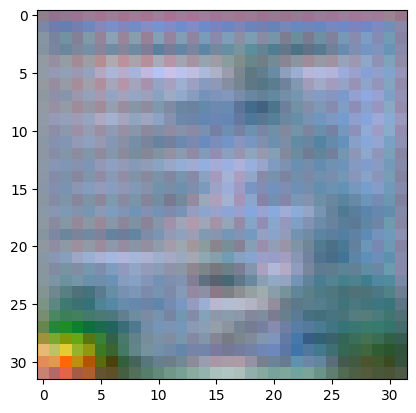

4/4 [==============================] - 1s 179ms/step
Batch Images-> 900


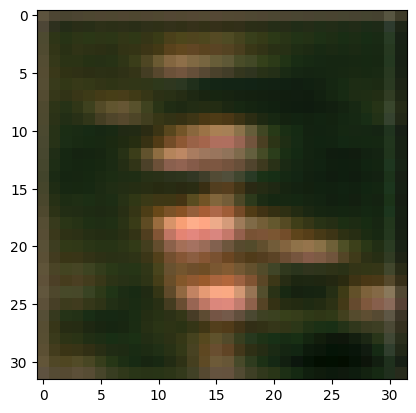

4/4 [==============================] - 1s 168ms/step
Batch Images-> 1000


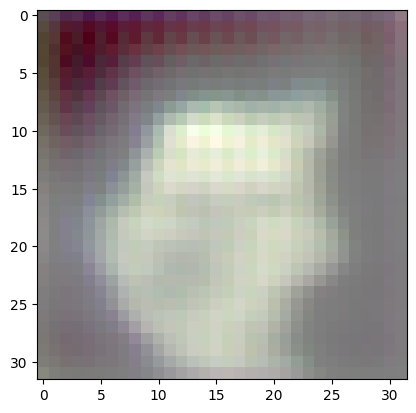

4/4 [==============================] - 1s 164ms/step
Batch Images-> 1100


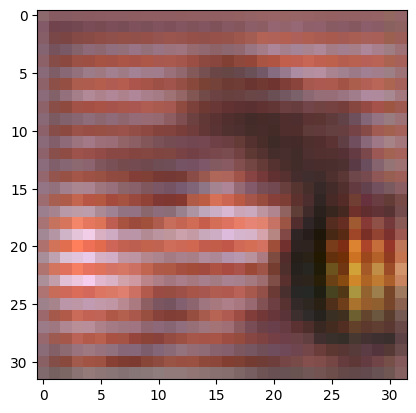

4/4 [==============================] - 1s 166ms/step
Batch Images-> 1200


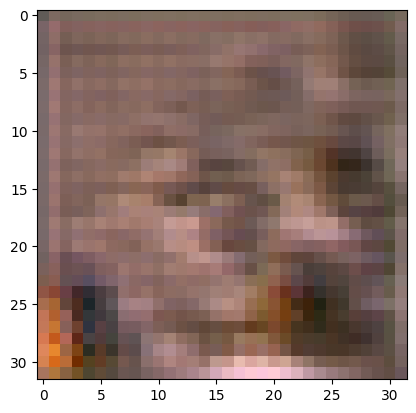

4/4 [==============================] - 1s 162ms/step
Batch Images-> 1300


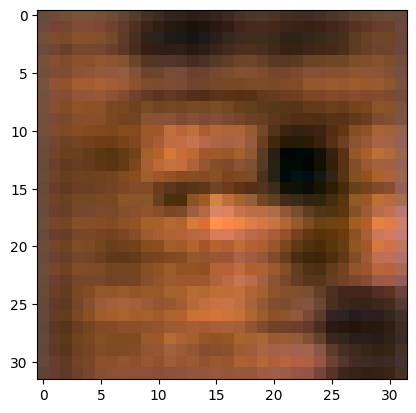

4/4 [==============================] - 1s 164ms/step
Batch Images-> 1400


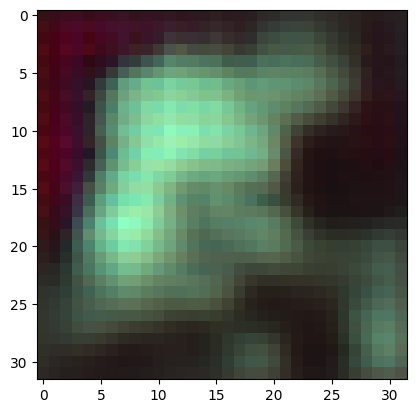

4/4 [==============================] - 1s 164ms/step
Batch Images-> 1500


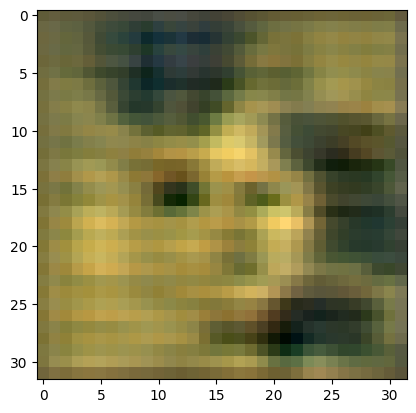

4/4 [==============================] - 1s 131ms/step
No of Epochs-> 4
4/4 [==============================] - 1s 159ms/step
Batch Images-> 0


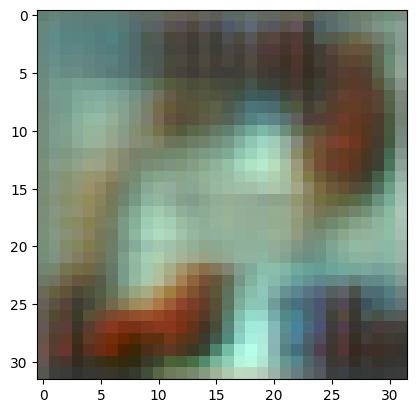

4/4 [==============================] - 1s 163ms/step
Batch Images-> 100


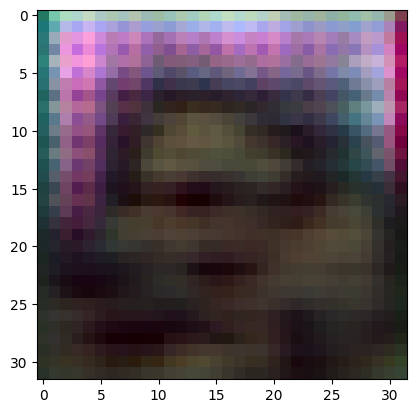

4/4 [==============================] - 1s 183ms/step
Batch Images-> 200


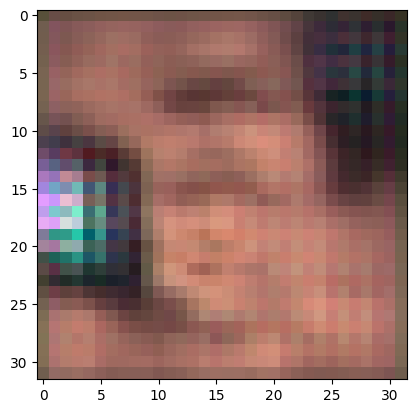

4/4 [==============================] - 1s 163ms/step
Batch Images-> 300


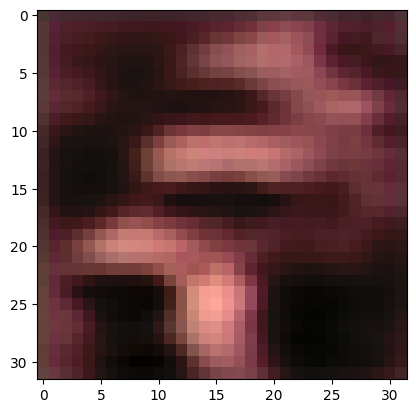

4/4 [==============================] - 1s 172ms/step
Batch Images-> 400


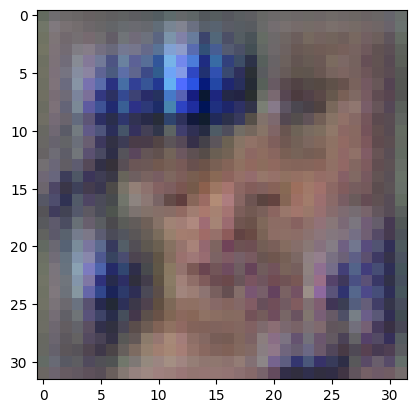

4/4 [==============================] - 1s 176ms/step
Batch Images-> 500


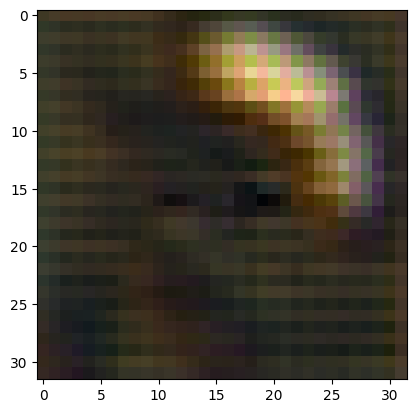

4/4 [==============================] - 1s 172ms/step
Batch Images-> 600


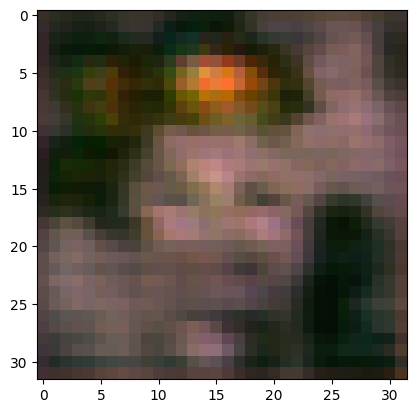

4/4 [==============================] - 1s 178ms/step
Batch Images-> 700


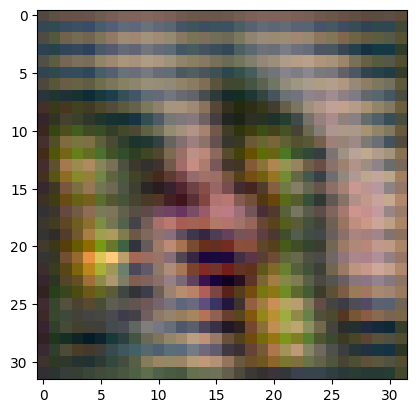

4/4 [==============================] - 1s 169ms/step
Batch Images-> 800


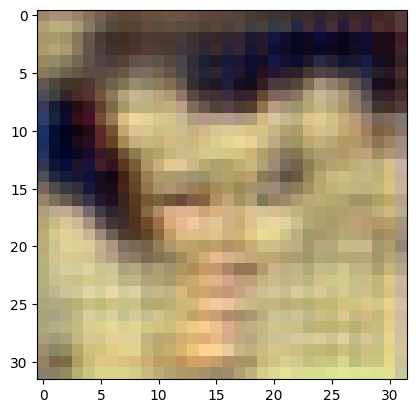

4/4 [==============================] - 1s 175ms/step
Batch Images-> 900


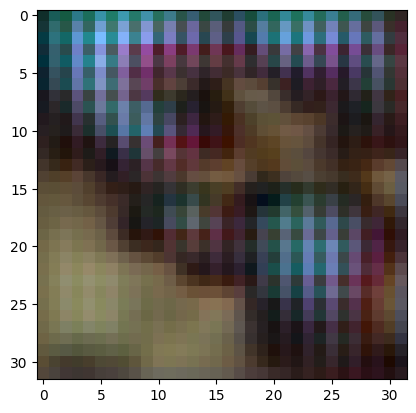

4/4 [==============================] - 1s 166ms/step
Batch Images-> 1000


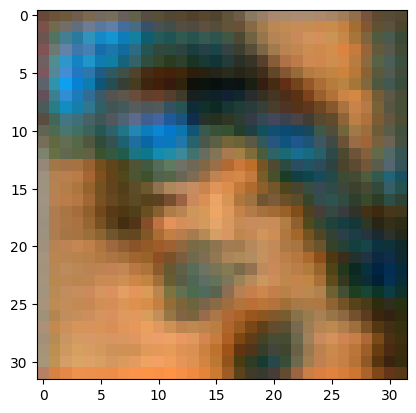

4/4 [==============================] - 1s 179ms/step
Batch Images-> 1100


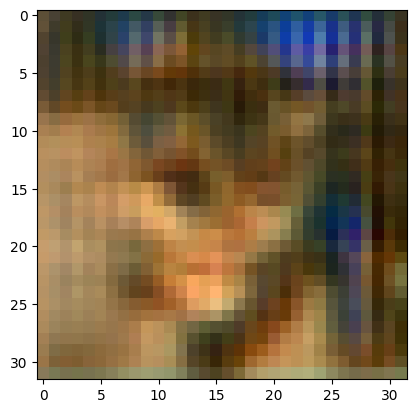

4/4 [==============================] - 1s 193ms/step
Batch Images-> 1200


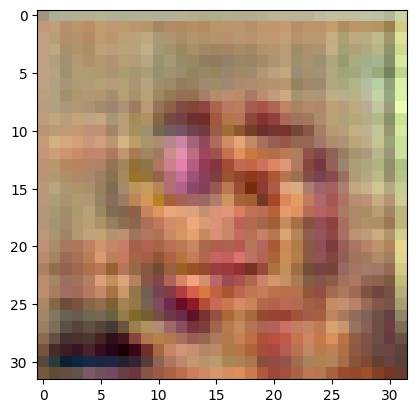

4/4 [==============================] - 1s 194ms/step
Batch Images-> 1300


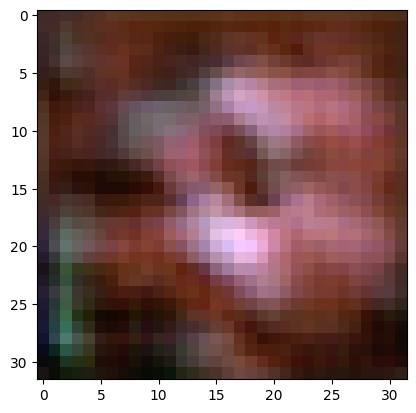

4/4 [==============================] - 1s 184ms/step
Batch Images-> 1400


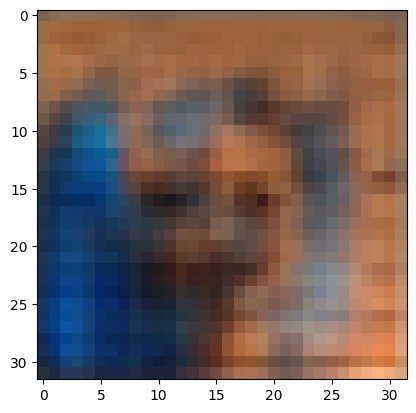

4/4 [==============================] - 1s 167ms/step
Batch Images-> 1500


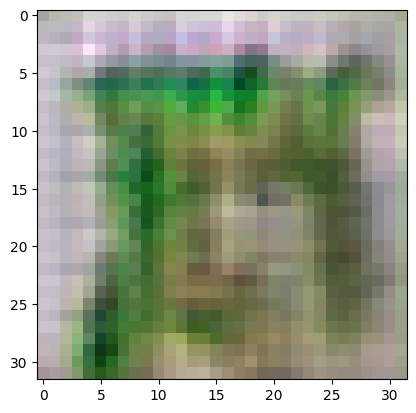

4/4 [==============================] - 1s 127ms/step
No of Epochs-> 5
4/4 [==============================] - 1s 166ms/step
Batch Images-> 0


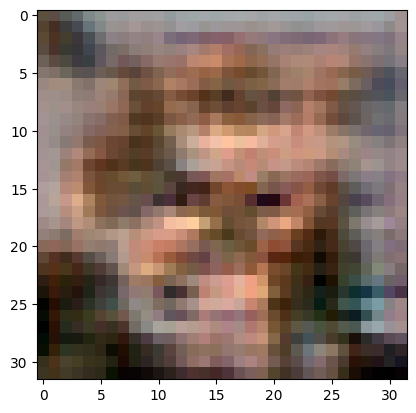

4/4 [==============================] - 1s 193ms/step
Batch Images-> 100


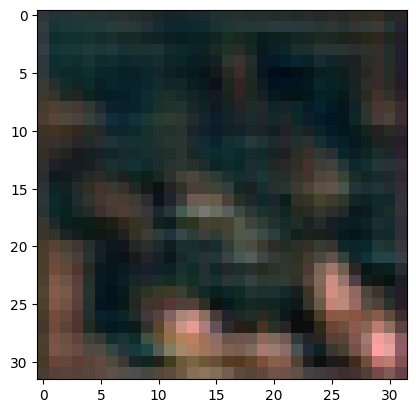

4/4 [==============================] - 1s 166ms/step
Batch Images-> 200


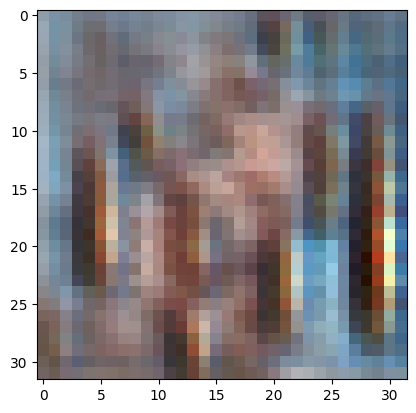

4/4 [==============================] - 1s 171ms/step
Batch Images-> 300


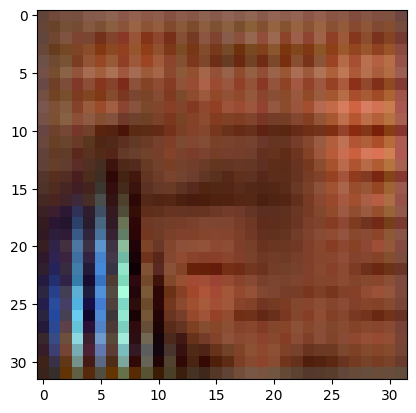

4/4 [==============================] - 1s 183ms/step
Batch Images-> 400


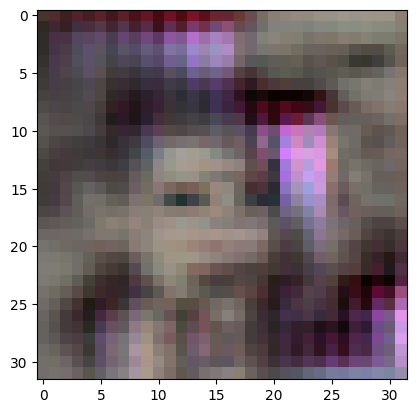

4/4 [==============================] - 1s 168ms/step
Batch Images-> 500


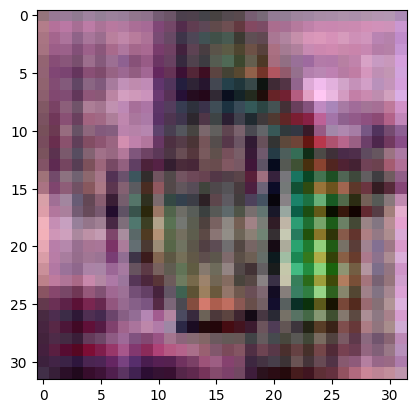

4/4 [==============================] - 1s 178ms/step
Batch Images-> 600


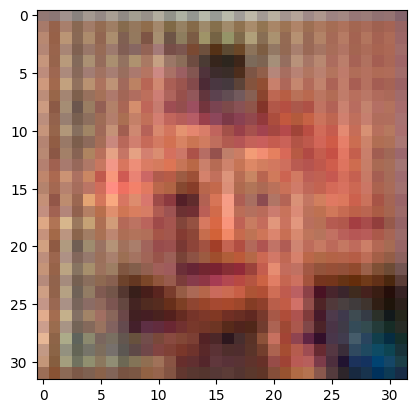

4/4 [==============================] - 1s 171ms/step
Batch Images-> 700


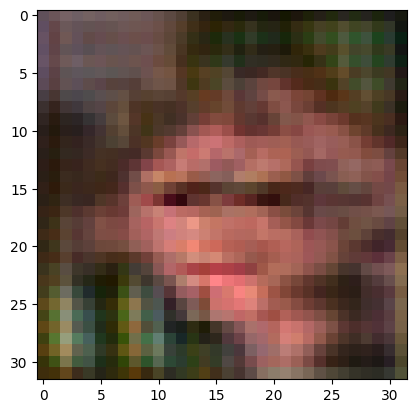

4/4 [==============================] - 1s 186ms/step
Batch Images-> 800


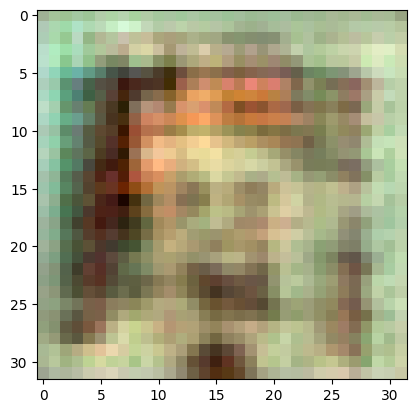

4/4 [==============================] - 1s 178ms/step
Batch Images-> 900


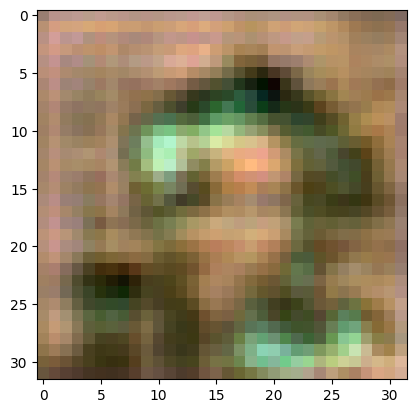

4/4 [==============================] - 1s 187ms/step
Batch Images-> 1000


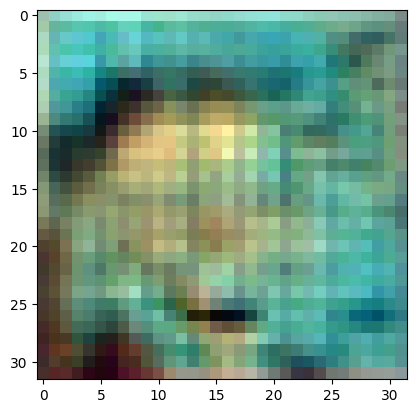

4/4 [==============================] - 1s 179ms/step
Batch Images-> 1100


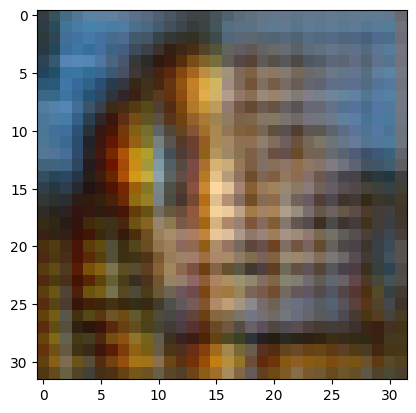

4/4 [==============================] - 1s 196ms/step
Batch Images-> 1200


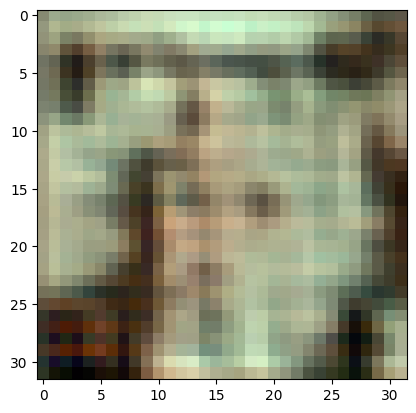

4/4 [==============================] - 1s 187ms/step
Batch Images-> 1300


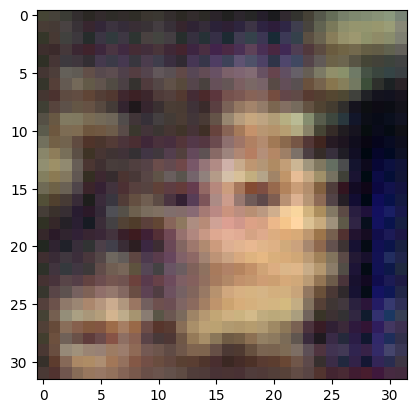

4/4 [==============================] - 1s 174ms/step
Batch Images-> 1400


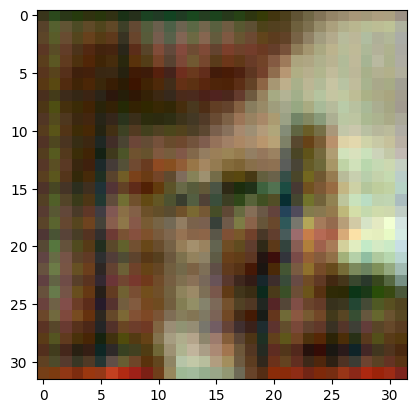

4/4 [==============================] - 1s 185ms/step
Batch Images-> 1500


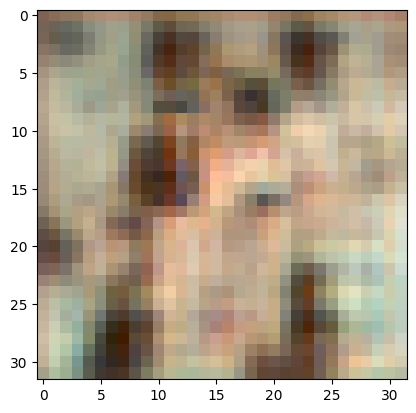

4/4 [==============================] - 1s 146ms/step
No of Epochs-> 6
4/4 [==============================] - 1s 192ms/step
Batch Images-> 0


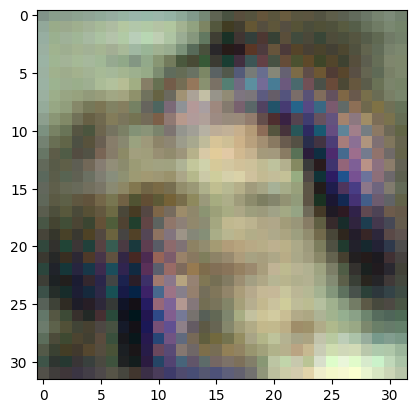

4/4 [==============================] - 1s 192ms/step
Batch Images-> 100


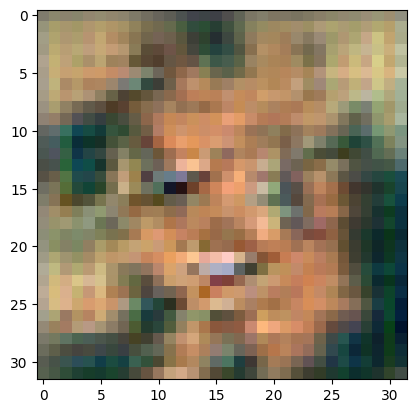

4/4 [==============================] - 1s 174ms/step
Batch Images-> 200


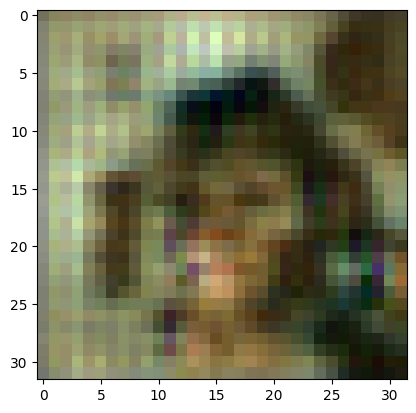

4/4 [==============================] - 1s 177ms/step
Batch Images-> 300


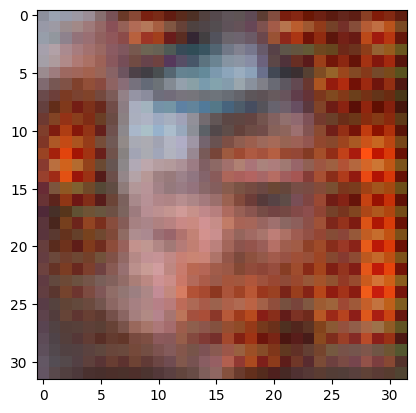

4/4 [==============================] - 1s 179ms/step
Batch Images-> 400


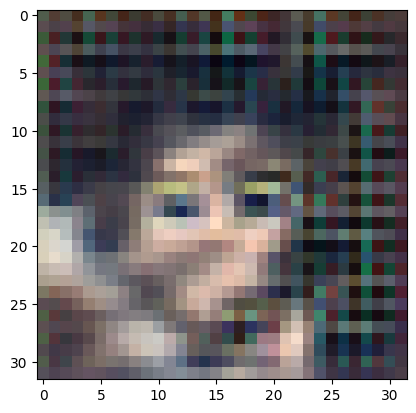

4/4 [==============================] - 1s 193ms/step
Batch Images-> 500


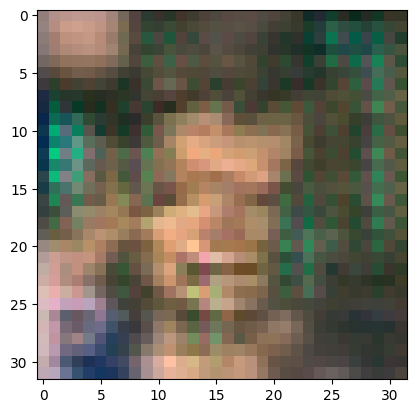

4/4 [==============================] - 1s 182ms/step
Batch Images-> 600


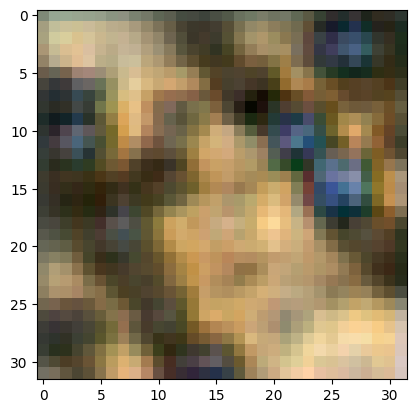

4/4 [==============================] - 1s 182ms/step
Batch Images-> 700


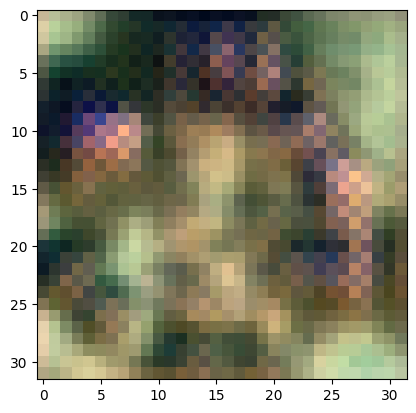

4/4 [==============================] - 1s 182ms/step
Batch Images-> 800


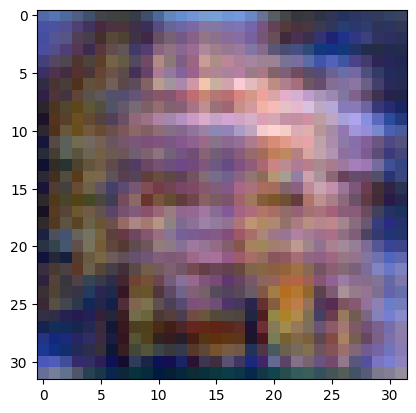

4/4 [==============================] - 1s 199ms/step
Batch Images-> 900


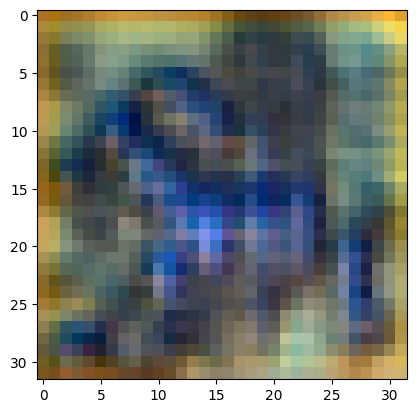

4/4 [==============================] - 1s 188ms/step
Batch Images-> 1000


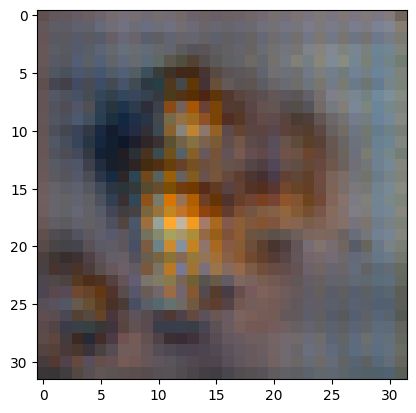

4/4 [==============================] - 1s 196ms/step
Batch Images-> 1100


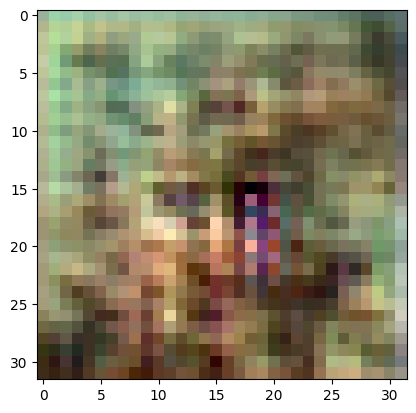

4/4 [==============================] - 1s 198ms/step
Batch Images-> 1200


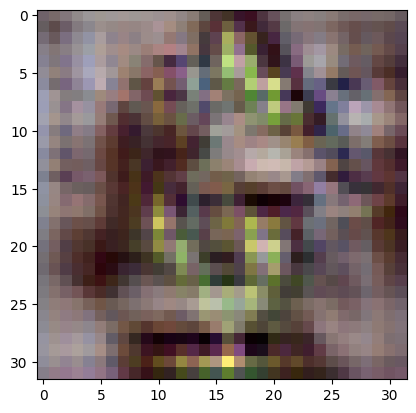

4/4 [==============================] - 1s 211ms/step
Batch Images-> 1300


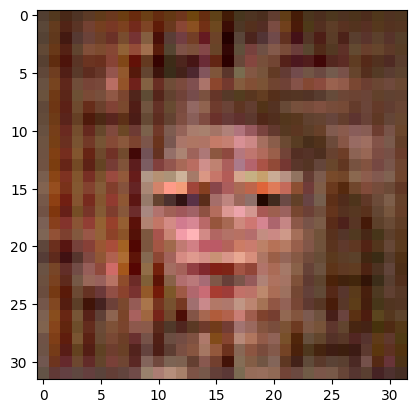

4/4 [==============================] - 1s 206ms/step
Batch Images-> 1400


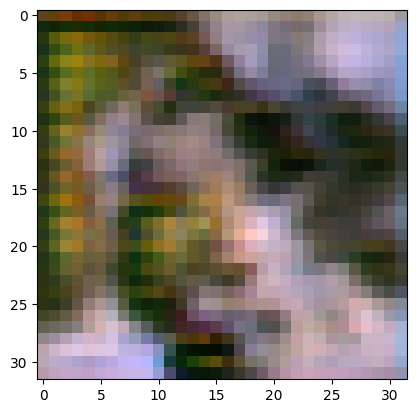

4/4 [==============================] - 1s 189ms/step
Batch Images-> 1500


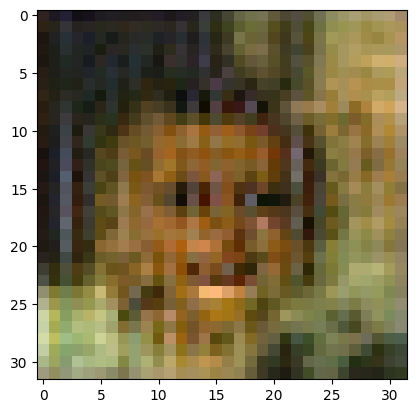

4/4 [==============================] - 1s 144ms/step
No of Epochs-> 7
4/4 [==============================] - 1s 207ms/step
Batch Images-> 0


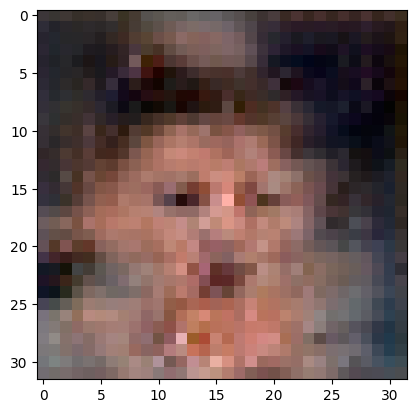

4/4 [==============================] - 1s 200ms/step
Batch Images-> 100


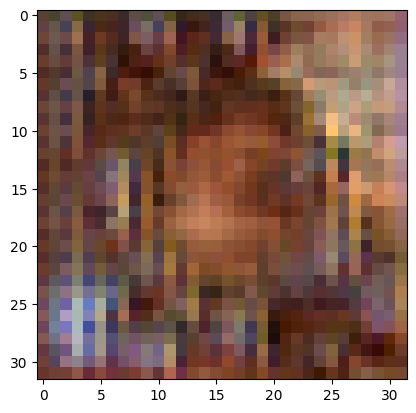

4/4 [==============================] - 1s 206ms/step
Batch Images-> 200


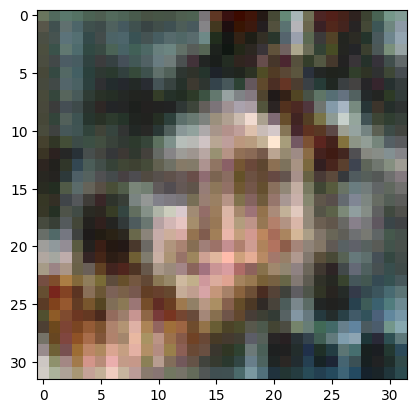

4/4 [==============================] - 1s 199ms/step
Batch Images-> 300


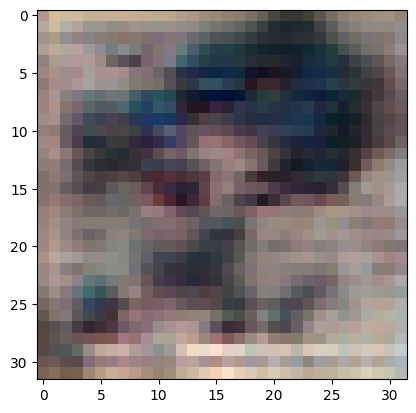

4/4 [==============================] - 1s 204ms/step
Batch Images-> 400


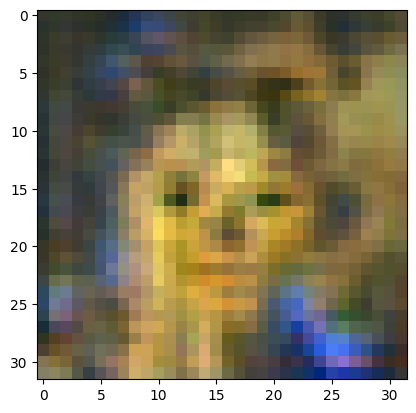

4/4 [==============================] - 1s 183ms/step
Batch Images-> 500


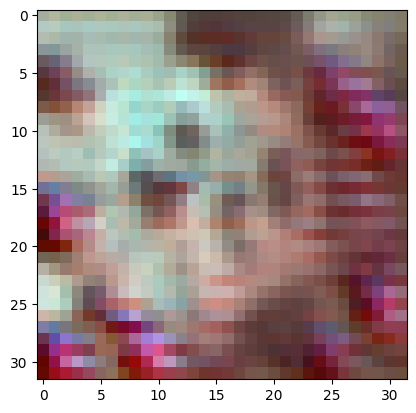

4/4 [==============================] - 1s 191ms/step
Batch Images-> 600


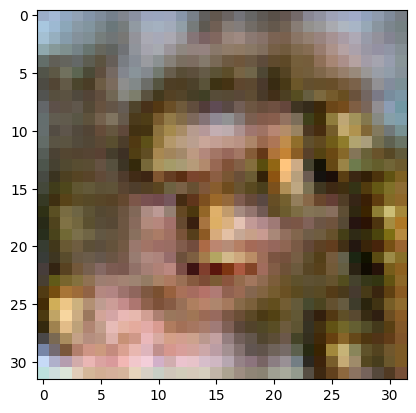

4/4 [==============================] - 1s 191ms/step
Batch Images-> 700


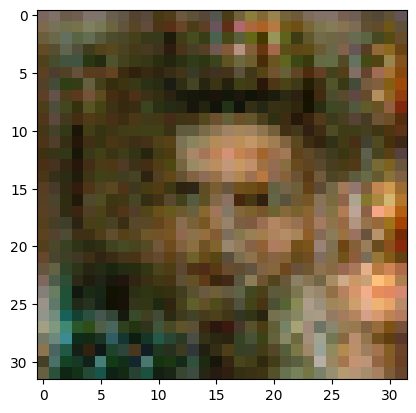

4/4 [==============================] - 1s 185ms/step
Batch Images-> 800


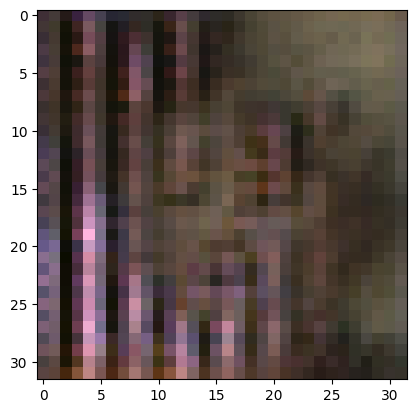

4/4 [==============================] - 1s 200ms/step
Batch Images-> 900


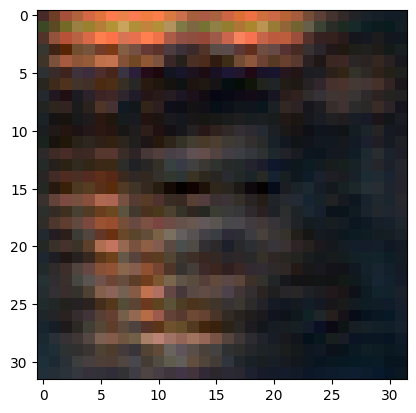

4/4 [==============================] - 1s 192ms/step
Batch Images-> 1000


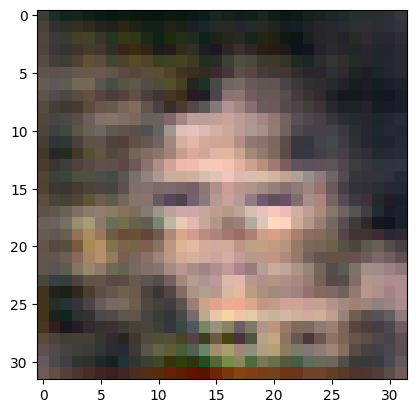

4/4 [==============================] - 1s 211ms/step
Batch Images-> 1100


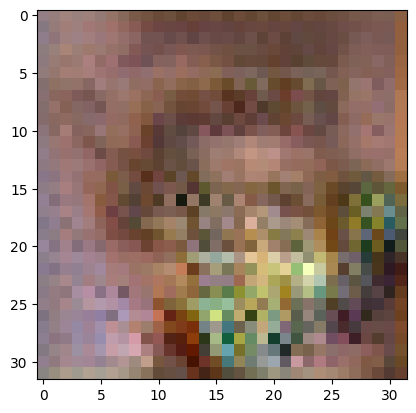

4/4 [==============================] - 1s 185ms/step
Batch Images-> 1200


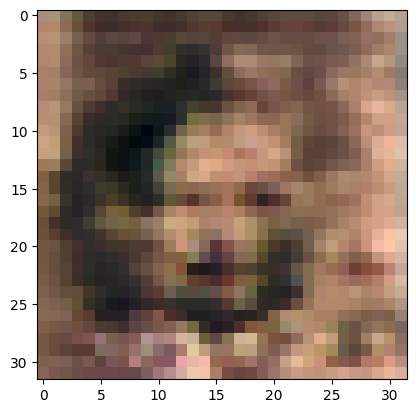

4/4 [==============================] - 1s 195ms/step
Batch Images-> 1300


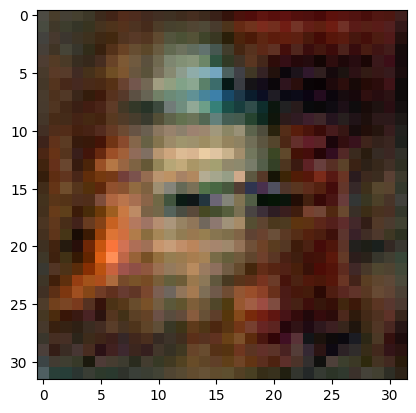

4/4 [==============================] - 1s 195ms/step
Batch Images-> 1400


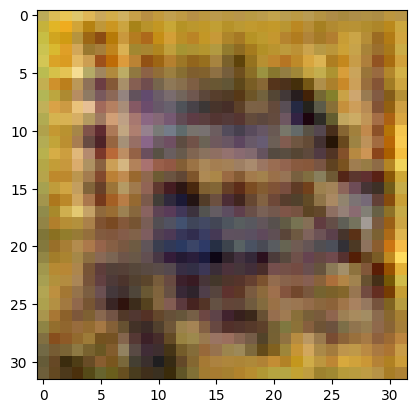

4/4 [==============================] - 1s 189ms/step
Batch Images-> 1500


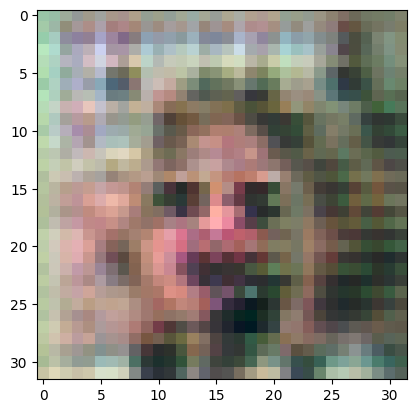

4/4 [==============================] - 1s 151ms/step
No of Epochs-> 8
4/4 [==============================] - 1s 232ms/step
Batch Images-> 0


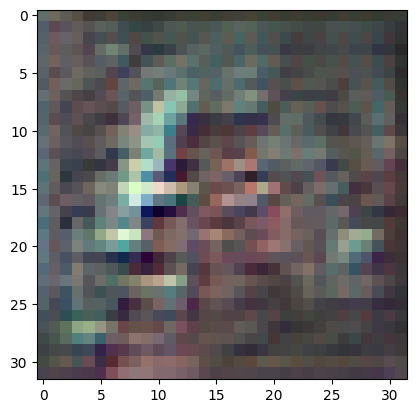

4/4 [==============================] - 1s 201ms/step
Batch Images-> 100


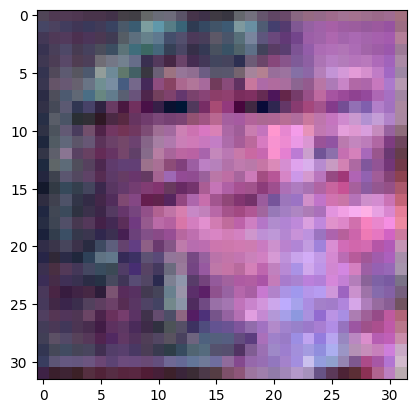

4/4 [==============================] - 1s 194ms/step
Batch Images-> 200


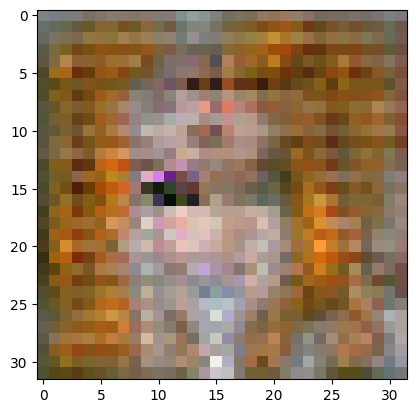

4/4 [==============================] - 1s 194ms/step
Batch Images-> 300


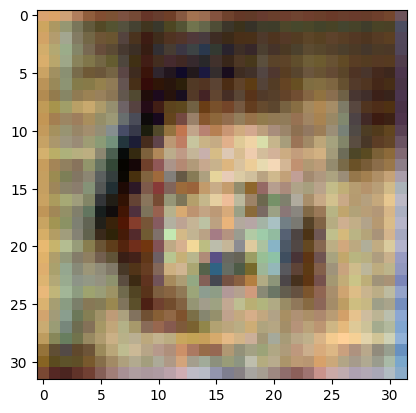

4/4 [==============================] - 1s 217ms/step
Batch Images-> 400


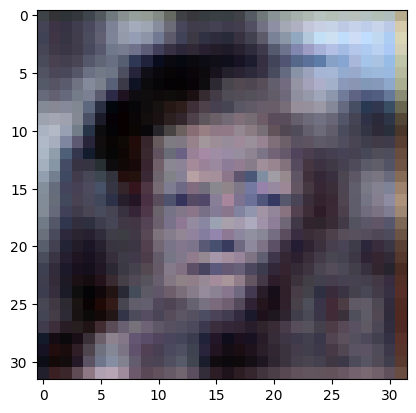

4/4 [==============================] - 1s 206ms/step
Batch Images-> 500


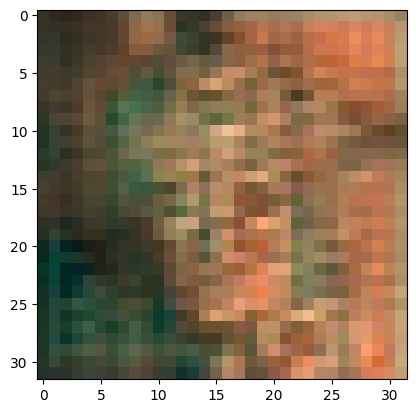

4/4 [==============================] - 1s 199ms/step
Batch Images-> 600


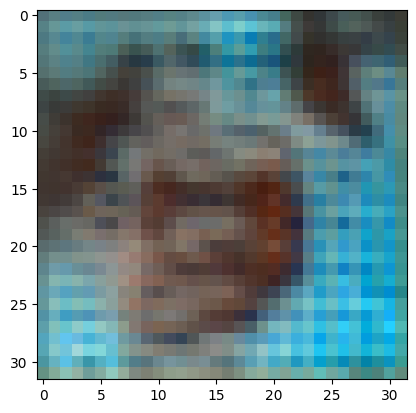

4/4 [==============================] - 1s 197ms/step
Batch Images-> 700


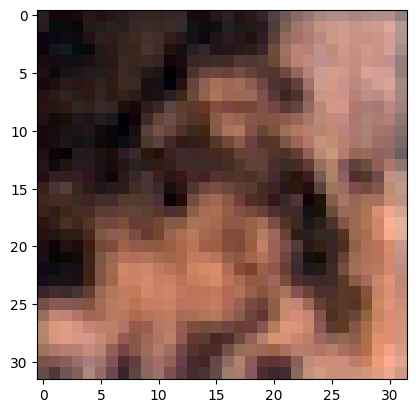

4/4 [==============================] - 1s 215ms/step
Batch Images-> 800


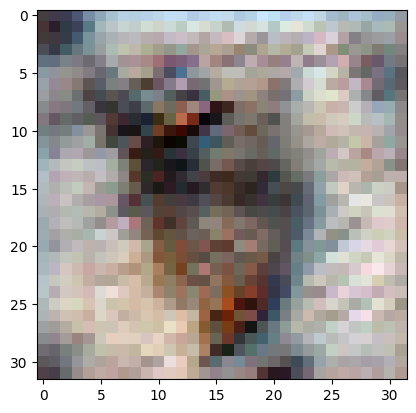

4/4 [==============================] - 1s 215ms/step
Batch Images-> 900


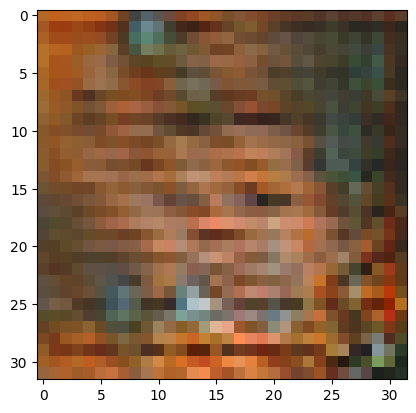

4/4 [==============================] - 1s 203ms/step
Batch Images-> 1000


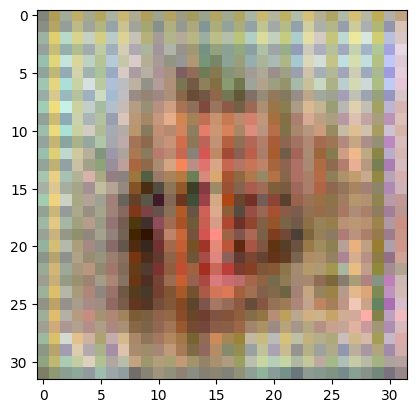

4/4 [==============================] - 1s 208ms/step
Batch Images-> 1100


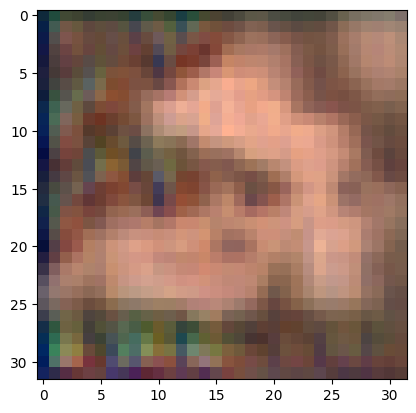

4/4 [==============================] - 1s 208ms/step
Batch Images-> 1200


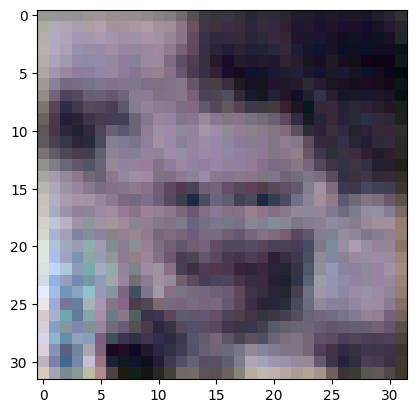

4/4 [==============================] - 1s 235ms/step
Batch Images-> 1300


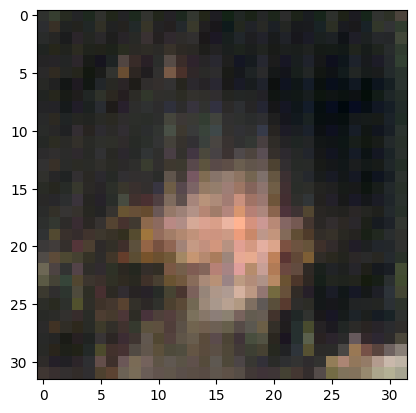

4/4 [==============================] - 1s 244ms/step
Batch Images-> 1400


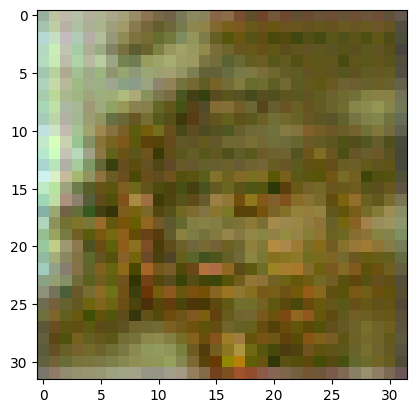

4/4 [==============================] - 1s 246ms/step
Batch Images-> 1500


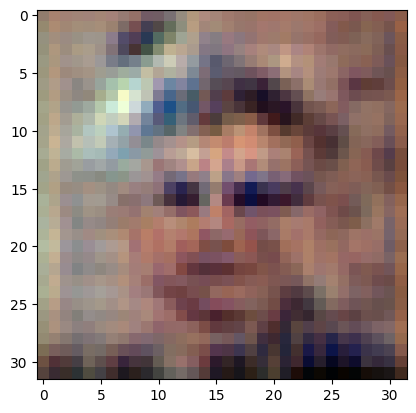

4/4 [==============================] - 1s 185ms/step
No of Epochs-> 9
4/4 [==============================] - 1s 250ms/step
Batch Images-> 0


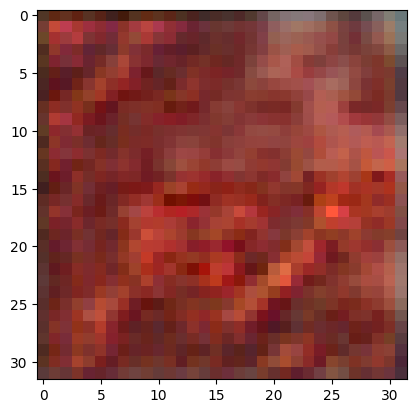

4/4 [==============================] - 1s 249ms/step
Batch Images-> 100


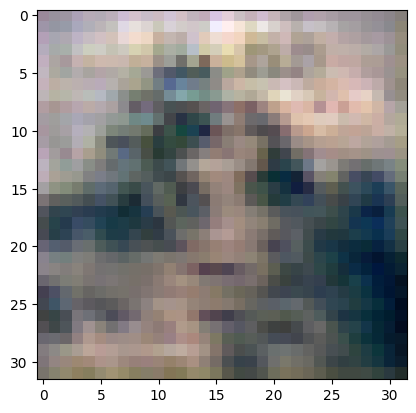

4/4 [==============================] - 1s 245ms/step
Batch Images-> 200


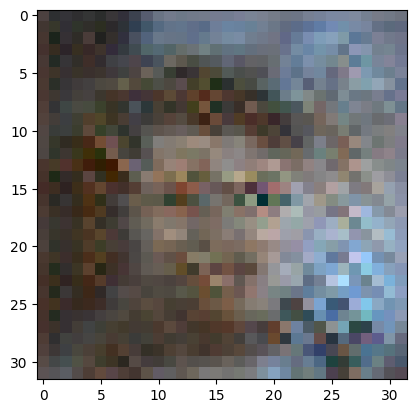

4/4 [==============================] - 1s 223ms/step
Batch Images-> 300


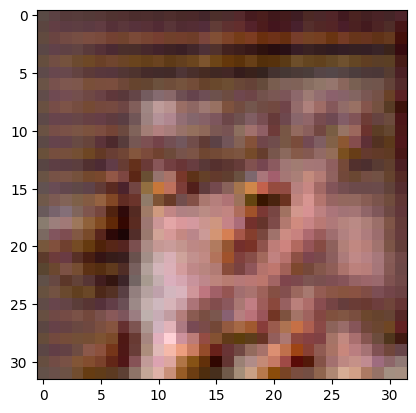

4/4 [==============================] - 1s 221ms/step
Batch Images-> 400


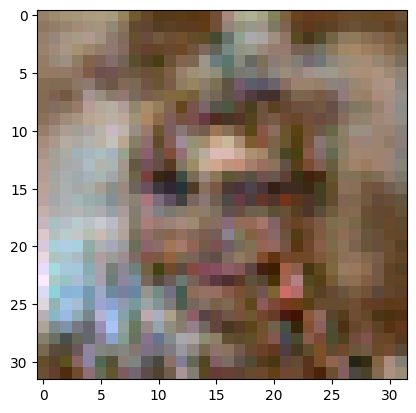

4/4 [==============================] - 1s 217ms/step
Batch Images-> 500


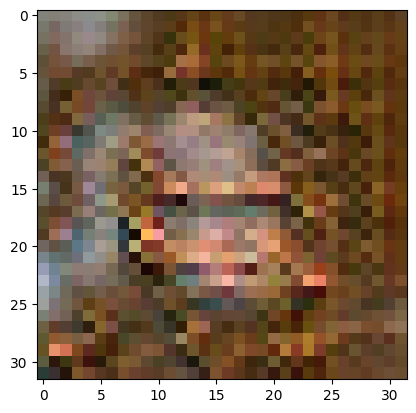

4/4 [==============================] - 1s 218ms/step
Batch Images-> 600


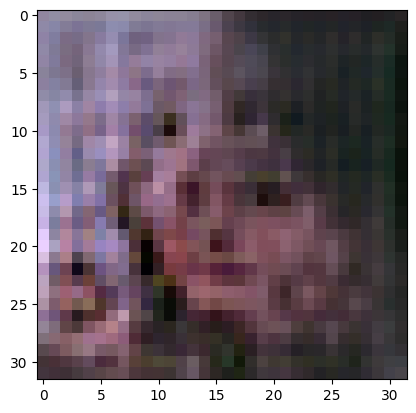

4/4 [==============================] - 1s 227ms/step
Batch Images-> 700


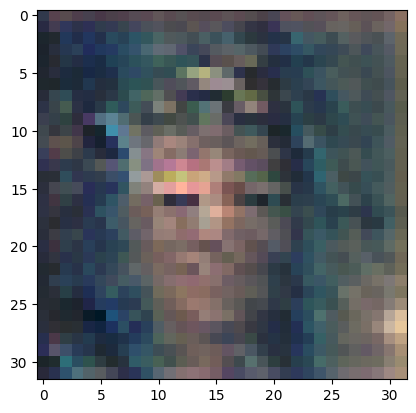

4/4 [==============================] - 1s 224ms/step
Batch Images-> 800


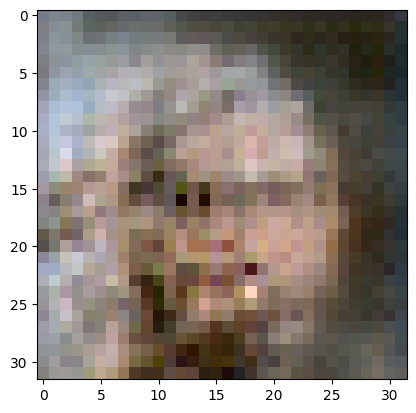

4/4 [==============================] - 1s 228ms/step
Batch Images-> 900


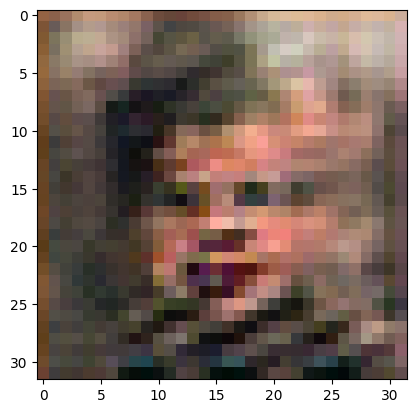

4/4 [==============================] - 1s 227ms/step
Batch Images-> 1000


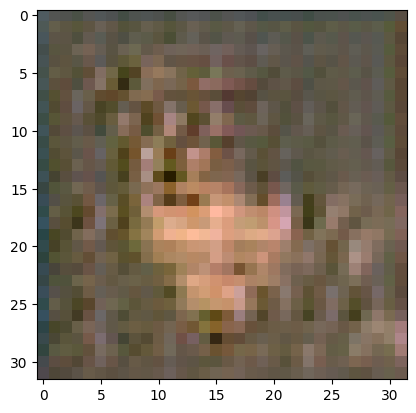

4/4 [==============================] - 1s 226ms/step
Batch Images-> 1100


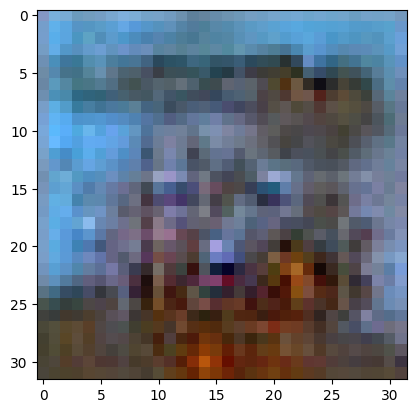

4/4 [==============================] - 1s 225ms/step
Batch Images-> 1200


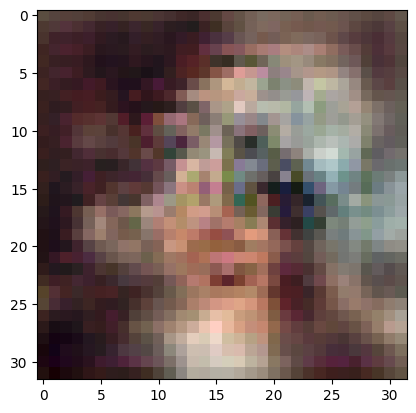

4/4 [==============================] - 1s 230ms/step
Batch Images-> 1300


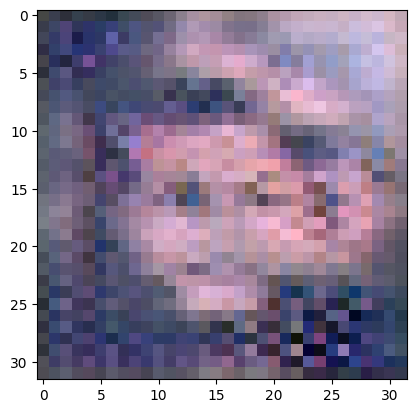

4/4 [==============================] - 1s 231ms/step
Batch Images-> 1400


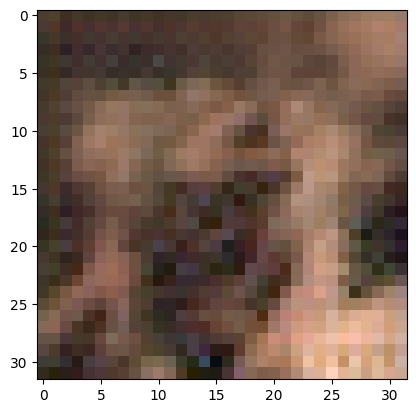

4/4 [==============================] - 1s 228ms/step
Batch Images-> 1500


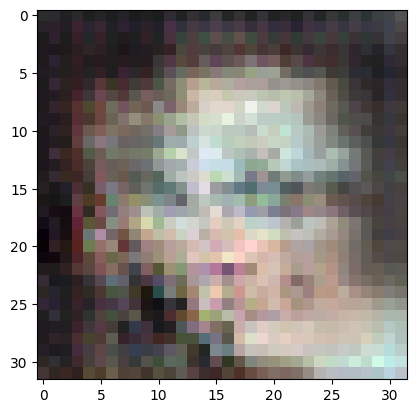

4/4 [==============================] - 1s 196ms/step


In [27]:
import os

for epochs in range(10):
    print(f'No of Epochs-> {epochs}')
    for i, batch in enumerate(dataset):
        train_discriminator(batch, batch.shape[0])
        train_generator(batch.shape[0])
        if i % 100 == 0:
            print(f'Batch Images-> {i}')
            PATH = 'generate_face'

            # Create the directory if it doesn't exist
            os.makedirs(PATH, exist_ok=True)

            # Generate and save the image
            generate_and_save_image(path=f'{PATH}/epochs_{epochs}batch_{i}.jpg')

In [28]:
# After training, save the generator model
gen_model.save('generator_model.h5')